### Задание 1
Найдите производные функций. Подробно распишите решение. Задание должно быть решено без использования Python.


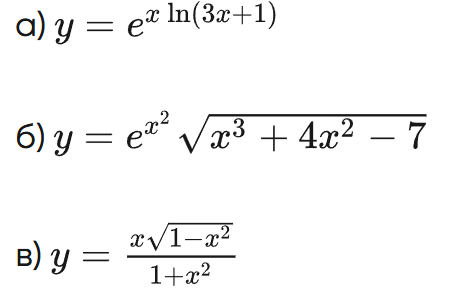

<div style="display: flex;">
  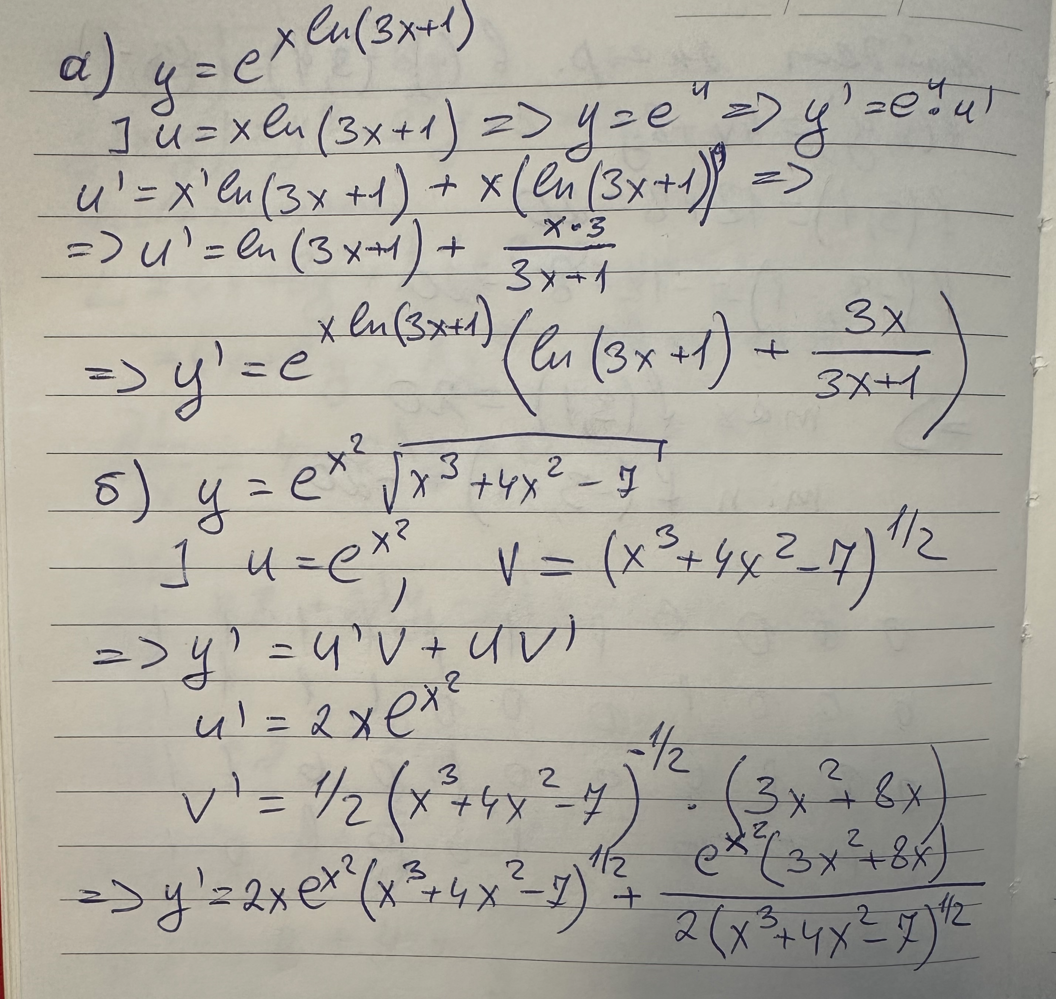
  
</div>

### Задание 2
Найдите безусловные экстремумы функции:
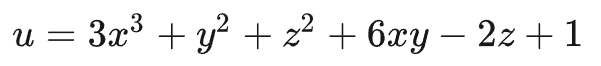
Подробно распишите решение. Задание должно быть решено без использования Python.

### Задание 3
Найдите условный экстремум функции:
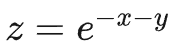
Если задано следующее условие:
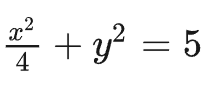
Подробно распишите решение. Задание должно быть решено без использования Python.

### Задание 4
Вам предоставлены данные о людях с наличием или отсутствием заболевания:

Признаки:

Age — возрастная группа.
Test — позитивный или негативный тест на заболевание.
Status — целевая переменная, есть инфекция или нет.
Необходимо реализовать алгоритм Наивного Байеса для решения задачи классификации. Обязательно оцените качество полученного результата по итогу.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sympy import symbols, exp, sqrt, log, simplify, Eq, solve, lambdify, factorial

# Загружаем данные
df = pd.read_csv('asset-v1_SkillFactory+MIFIML-1sem+2024+type@asset+block@sf_exam.csv')

# Преобразуем категориальные данные в числовые значения
df['Age_Group'] = df['Age_Group'].map({'Young': 0, 'Old': 1})
df['Test'] = df['Test'].map({'Positive': 1, 'Negative': 0})
df['Status'] = df['Status'].map({'Infected': 1, 'Not_infected': 0})

# Разделяем данные на признаки и целевую переменную
X = df[['Age_Group', 'Test']]
y = df['Status']

# Разобьём выборку на обучающую и тестовую в пропорции 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Инициализируем и обучаем BernoulliNB т.к. признаки бинарные
model = BernoulliNB()
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

# Оценка модели
# Доля всех правильных предсказаний
accuracy = accuracy_score(y_test, y_pred)
# Доля правильных положительных предсказаний
precision = precision_score(y_test, y_pred)
# Доля правильных положительных предсказаний среди всех настоящих положительных значений
recall = recall_score(y_test, y_pred)

# Выводим результат
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.7678571428571429
Precision: 0.8076923076923077
Recall: 0.7241379310344828


#### Оценка качества полученного результата
Accuracy: 0.768 это доля правильных предсказаний среди всех случаев (и положительных, и отрицательных). В данном случае, модель правильно предсказала наличие или отсутствие инфекции в 76.8% всех случаев. Precision: 0.808 показывает, как часто модель ошибается, когда предсказывает, что у человека есть инфекция. Она равна 80.8%, это означает, что когда модель говорит, что человек болен, она ошибается примерно в 19.2% случаев. Recall: 0.724 показывает, насколько хорошо модель находит все реальные случаи инфекции. В данном случае, она находит 72.4% всех заболевших людей. То есть, если в данных есть человек с инфекцией, модель правильно определяет это в 72.4% случаев.

### Задание 5
Дана функция:

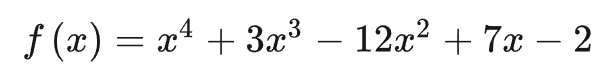

Оптимизируйте её с помощью метода Ньютона, используя язык программирования Python.

За начальную точку возьмите х = 10, необходимую точность 0.0001.

In [11]:
# Определяем переменную и функцию
x = symbols('x')
f = x**4 + 3*x**3 - 12*x**2 + 7*x - 2

# Вычисляем первую производную
f_prime = f.diff(x)
# Вычисляем вторую производную
f_double_prime = f_prime.diff(x)

# Преобразуем производные в численные функции
func1 = lambdify(x, f_prime, 'numpy')
func2 = lambdify(x, f_double_prime, 'numpy')

# Объявляем функцию
def newtons_method(f, fprime, x0, tol=0.0001):
    # Счётчик итераций
    iter_count = 0
    # Текущее значение
    x_curr = x0
    # Вычисляем значение функции в начальной точке
    f_val = f(x_curr)
    # Запускаем итеративный процесс
    # Повторяем, пока значение функции больше допустимой ошибки
    while (abs(f_val) > tol):
        # Вычисляем значение функции в текущей точке
        f_val = f(x_curr)
        # Вычисляем значение производной в текущей точке
        f_prime_val = fprime(x_curr)
        # Обновляем x
        x_curr = x_curr - (f_val)/(f_prime_val)
        # Увеличиваем счётчик итераций
        iter_count += 1
    return x_curr

# Находим точку экстремума функции 
newtons_method(f=func1, fprime=func2, x0 = 10, tol = 0.0001)

1.310135602950187

### Задание 6
Дано распределение случайной величины, которая отражает вероятность получения разного количества спам-писем в течение дня:

- Найдите вероятность получения 7 спам-писем.
- Найдите математическое ожидание для количества полученных писем.
- Найдите дисперсию для количества полученных писем. Ответ округлите до сотых.

Задание должно быть решено без использования готовых функций Python.

In [13]:
# Количество писем
x_val = [0, 1, 2, 3, 4, 5, 6, 7]
# Вероятности
p_val = [0.1, 0.3, 0.1, 0.25, 0.05, 0.05, 0.1, None]


# Инициализируем переменную для хранения суммы вероятностей
sum_p = 0
# Проходим по всем значениям вероятностей в списке p_val
for i in p_val:
    # Проверяем, что значение i не является None
    if i is not None:
        # Если значение не None, добавляем его к общей сумме
        sum_p += i

# Вычисляем недостающую вероятность для x = 7
p_val[-1] = 1 - sum_p
print(f"Вероятность получения 7 писем: P(7) = {p_val[-1]:.2f}")

# Инициализируем переменную для математического ожидания
ex = 0 
# Запускаем цикл с индексом
for i in range(len(x_val)):
    # Текущее значение случайной величины
    x = x_val[i]
    # Соответствующая вероятность
    p = p_val[i]
    # Добавляем произведение x и p к математическому ожиданию
    ex += x * p 
print(f"Математическое ожидание: E(X) = {ex:.2f}")

# Инициализируем переменную для дисперсии
dx = 0  
# Запускаем цикл с индексом
for i in range(len(x_val)):
    # Текущее значение случайной величины
    x = x_val[i]
    # Соответствующая вероятность
    p = p_val[i]
    # Добавляем вклад каждого элемента в дисперсию
    dx += p * (x - ex)**2  

print(f"Дисперсия: D(X) = {dx:.2f}")


Вероятность получения 7 писем: P(7) = 0.05
Математическое ожидание: E(X) = 2.65
Дисперсия: D(X) = 4.03


### Задание 7
За 8 часов рабочего дня в колл-центр поступает в среднем 16 звонков. Найдите вероятность, что за час в колл-центр поступит не более 4 и не менее 2 звонков. Ответ округлите до тысячных. Задание должно быть решено без использования готовых функций Python.

In [15]:
# Среднее число событий за час
lambda_val = 2  

# Находим P(2 <= X <= 4) вручную
result = 0
# Запускаем цикл для расчета вероятностей k = 2, 3, 4
for k in range(2, 5): 
    # Вычисляем вероятность по формуле Пуассона
    prob = (lambda_val ** k) * exp(-lambda_val) / factorial(k)
    # Суммируем вероятности
    result += prob

# Округляем до тысячных и выводим результат
print(f"Вероятность: {result:.3f}")


Вероятность: 0.541
